# Titanic: Machine Learning from Disaster
##### What to predict
##### Importing Tools & Collecting the data
##### Exploratory data analysis
##### Feature engineering
##### Modelling
##### Testing

## 1. What to predict
* Find who all are likely to survive in the Titanic ship tragedy
* We will use the tools of machine learning to predict which passengers survived.

## 2. Importing Tools & Collecting the data
* training data set and testing data set are given by Kaggle

In [2]:
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

##### Loading the data and print the first 5 lines

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3. Exploratory data analysis
### Data Dictionary
* Survived: 0 = No, 1 = Yes
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* cabin: Cabin number
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
* (Training Set)-->Rows=891 & Columns= 12
* (Testing Set)--> Rows=418 & Columns= 11

### Let's see the graphical analysis

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [6]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

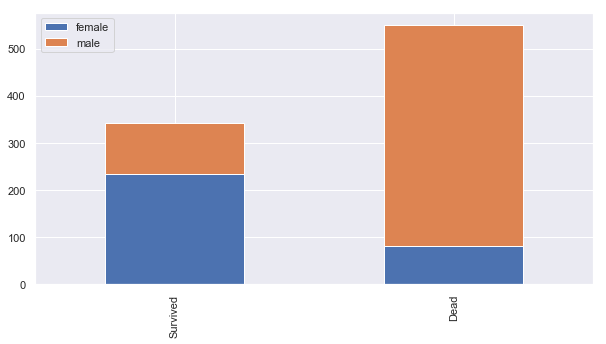

In [7]:
bar_chart('Sex')

* it shows <b>female</b> has higher chance of survival than <b>men</b>

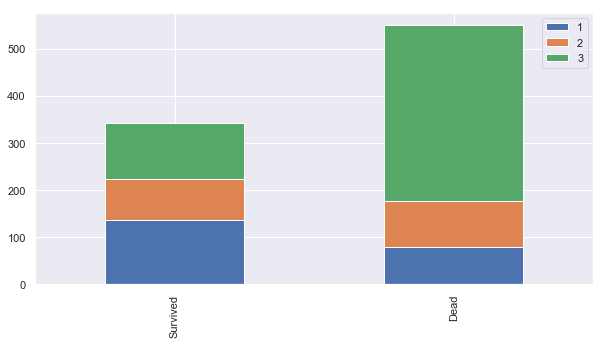

In [8]:
bar_chart('Pclass')

* it shows <b>1st Class</b> has higher chance of survival than <b>other classes</b>
* it also shows that <b>3rd Class</b> has higher chance of death than <b>other classes</b>

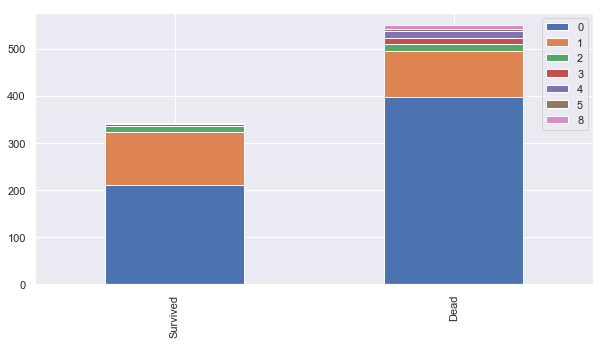

In [9]:
bar_chart('SibSp')

* <b>No clear interpreation</b> can we get from here as person with 0 siblings has both higher chances of survival and death as the proportions in survival and dead bar are similar

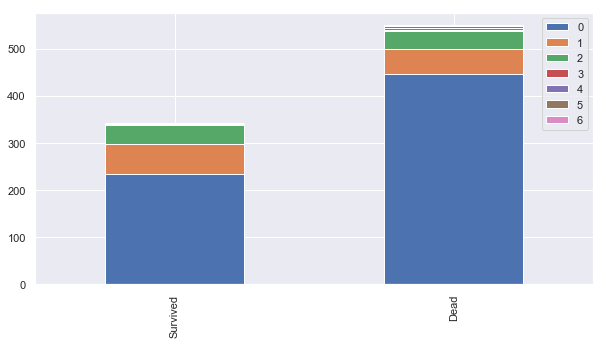

In [10]:
bar_chart('Parch')

* <b>No clear interpreation</b> can we get from here as the proportions in survival and dead bar are similar

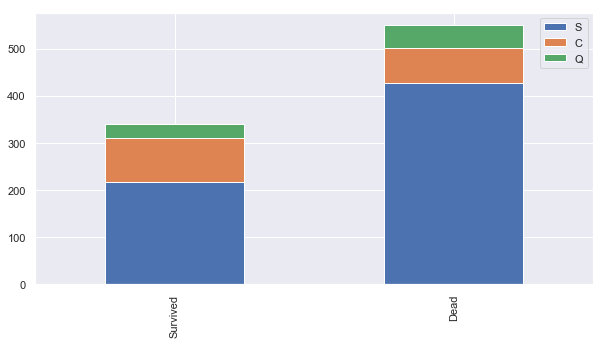

In [11]:
bar_chart('Embarked')

* <b>No clear interpreation</b> can we get from here as the proportions in survival and dead bar are similar

## 4. Feature Engineering
* Feature engineering is the process of using domain knowledge of the data to create features (feature vectors) that make   the dataset more simpler and easier for the machine learning algorithms to work better and faster.

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### FInding any missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


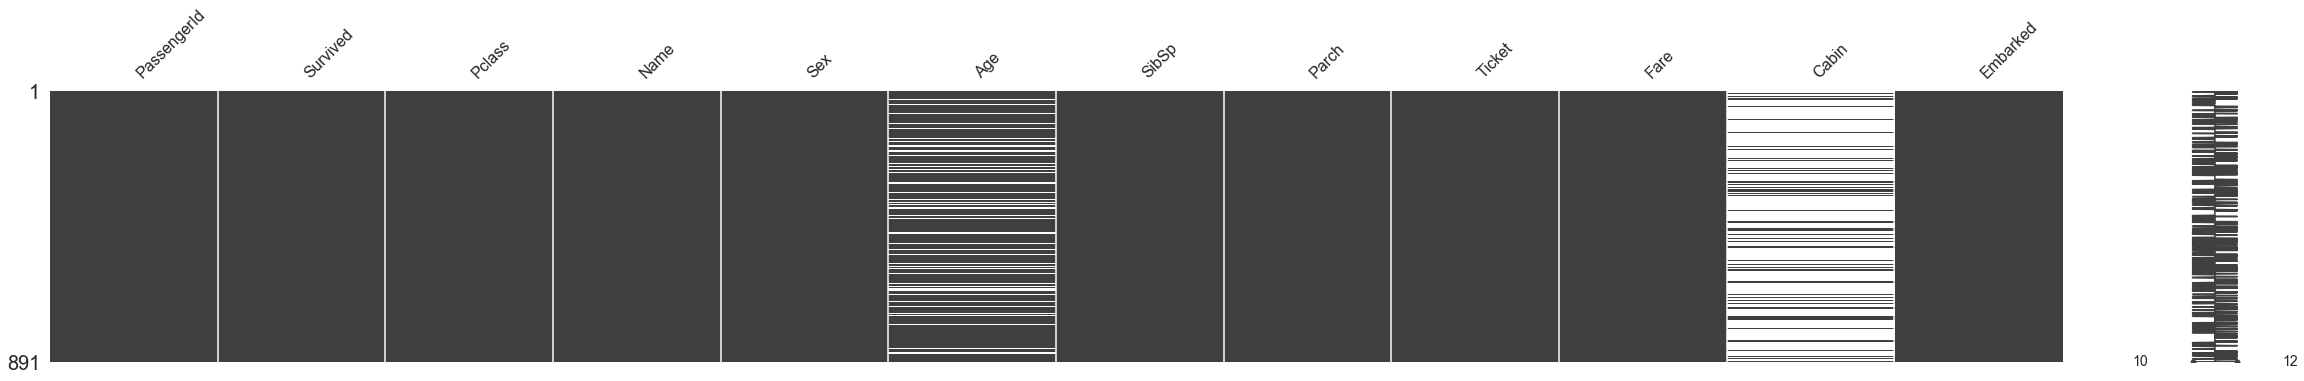

In [13]:
print(train.isnull().sum())
missingno.matrix(train, figsize = (40,5))

###### Here values in Age, Cabin and Embarked are missing for the training set

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


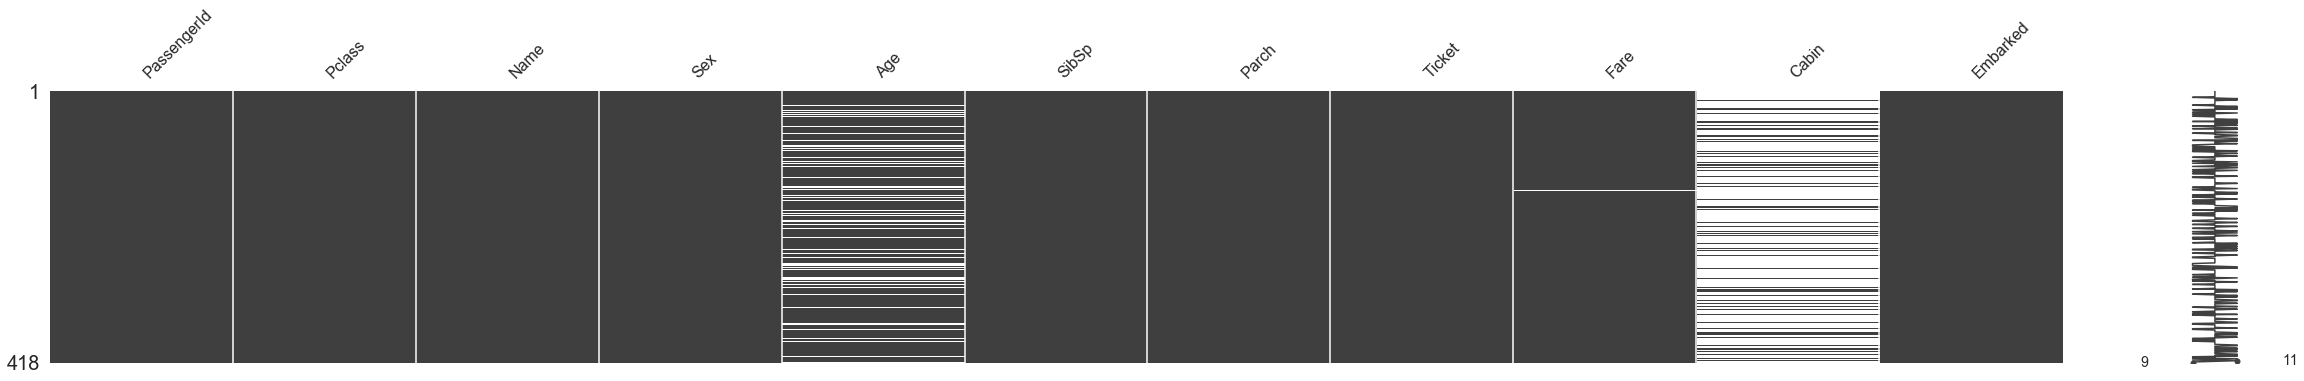

In [14]:
print(test.isnull().sum())
missingno.matrix(test, figsize = (40,5))

###### Here also values in Age, Cabin and Fare are missing for the testing set

### Here need to convert some values into Numbers and fill the missing values

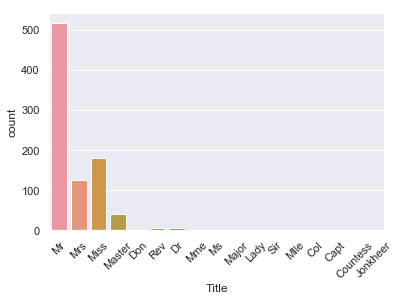

In [15]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
sns.countplot(x='Title', data=train)
plt.xticks(rotation=45);

In [16]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

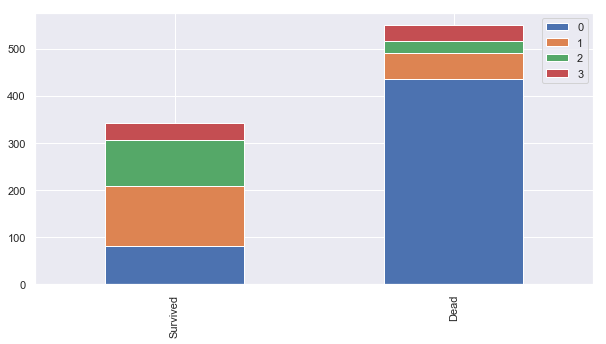

In [17]:
bar_chart('Title')

### We will now fill the missing Values
* we will fill with it median values since there are outliers in the dataset

In [18]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

### Let's now see the Embarked column

In [19]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

###### Lets see how it relates with Pclass 

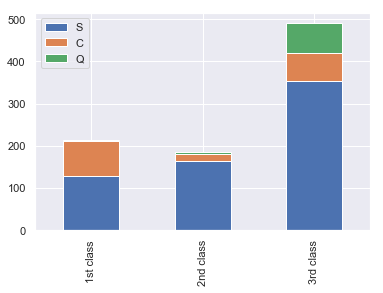

In [20]:
Pclass1=train[train['Pclass']==1].Embarked.value_counts()
Pclass2=train[train['Pclass']==2].Embarked.value_counts()
Pclass3=train[train['Pclass']==3].Embarked.value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True)

* So here we can see that the S is the majority in all the 3 Pclass
* So we can fill the missing values with it

In [21]:
train.Embarked.fillna('S',inplace=True)
test.Embarked.fillna('S',inplace=True)

##### Also we need to convert into numbers since scikit learn needs only numerical values

In [22]:
from sklearn.preprocessing import LabelEncoder
train.Embarked=LabelEncoder().fit_transform(train.Embarked)
test.Embarked=LabelEncoder().fit_transform(test.Embarked)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2,0
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,2,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,2,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,2,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,0,2


### Let's Analyse the Cabin Column
* Here there are values which are Alphanumerical so we need to extract only meaningful information
* We can do that by extracting only the first character
* Also we can see some of the missing values 
* we can fill only when we have converted the characters to some numerical values

##### This operation needs to be done both on training and testing set so from now on we will combine them to a single set and we do the operation on it to reflect on both

In [23]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

* Let's convert these characters to numbers

In [24]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

###### We can fill the values in cabin acc to the Pclass for that lets group the data acc to Pclass

In [25]:
train.groupby('Pclass').Cabin.value_counts()

Pclass  Cabin
1       0.8      59
        0.4      47
        1.2      29
        1.6      25
        0.0      15
        2.8       1
2       2.0       8
        1.2       4
        1.6       4
3       2.0       5
        2.4       4
        1.6       3
Name: Cabin, dtype: int64

In [26]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### Let's handle the Fare column
* we need to fill it's missing value in the testing set

In [27]:
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

### Let's check now the missing values

In [28]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [29]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

### So both sets are now filled

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2.0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.8,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2.0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.8,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2.0,2,0


### We don't need the Name column so let's drop it

In [31]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

### Also the Age is on float and not categorical so let's convert them into certain categories

* child: 0
* young: 1
* adult: 2
* mid-age: 3
* senior: 4

In [32]:
train.Sex=LabelEncoder().fit_transform(train.Sex)
test.Sex=LabelEncoder().fit_transform(test.Sex)

for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
    
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,2.0,2,0
1,2,1,1,0,3.0,1,0,PC 17599,71.2833,0.8,0,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,2.0,2,1
3,4,1,1,0,2.0,1,0,113803,53.1000,0.8,2,2
4,5,0,3,1,2.0,0,0,373450,8.0500,2.0,2,0


### The Fare column is also not categorical so let's convert them into certain categories

<Figure size 360x288 with 0 Axes>

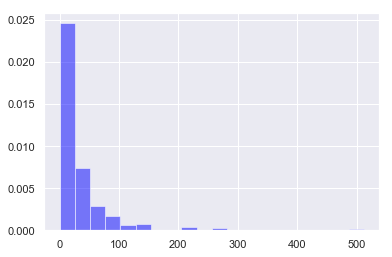

<Figure size 360x288 with 0 Axes>

In [75]:
plt.hist(train.Fare, 20,density=1, facecolor='blue', alpha=0.5)
plt.figure(figsize=(5,4))

* till 25: 0
* 25-50 : 1
* 50-100:2
* greater than 100 :3

In [76]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 25, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 25) & (dataset['Fare'] <= 50), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 50) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3
    
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,2.0,2,0
1,2,1,1,0,3.0,1,0,PC 17599,2.0,0.8,0,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,2.0,2,1
3,4,1,1,0,2.0,1,0,113803,2.0,0.8,2,2
4,5,0,3,1,2.0,0,0,373450,0.0,2.0,2,0
5,6,0,3,1,2.0,0,0,330877,0.0,2.0,1,0
6,7,0,1,1,3.0,0,0,17463,2.0,1.6,2,0
7,8,0,3,1,0.0,3,1,349909,0.0,2.0,2,3
8,9,1,3,0,2.0,0,2,347742,0.0,2.0,2,2
9,10,1,2,0,0.0,1,0,237736,1.0,1.8,0,2


### Since both SibSp and Parch are indicators of Family so let's combine them to a single value --> FamilySize

In [77]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1

In [78]:
train.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

### let's convert FamilySize into certain categories

* 1:   0--> single
* 2:   0.5--> couple
* 3-4: 1--> having upto 2 children
* more than 4: 1.5--> more than 2 children

In [80]:
family_mapping = {1: 0, 2: 0.5, 3: 1, 4: 1, 5: 1.5, 6: 1.5, 7: 1.5, 8: 1.5, 9: 1.5, 10: 1.5, 11: 1.5}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [83]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,2.0,2,0,0.5
1,2,1,1,0,3.0,1,0,PC 17599,2.0,0.8,0,2,0.5
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,2.0,2,1,0.0
3,4,1,1,0,2.0,1,0,113803,2.0,0.8,2,2,0.5
4,5,0,3,1,2.0,0,0,373450,0.0,2.0,2,0,0.0


### Now let's drop the columns which are not wanted
* Ticket
* Passenger Id
* SibSp & Parch ( since we combined them into FamilySize)
* We can't remove the PassengerId from test set because we need it later during testing

In [85]:
train.drop(['Ticket','SibSp','Parch','PassengerId'],axis=1,inplace=True)
test.drop(['Ticket','SibSp','Parch'],axis=1,inplace=True)

In [86]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,1,1.0,0.0,2.0,2,0,0.5
1,1,1,0,3.0,2.0,0.8,0,2,0.5
2,1,3,0,1.0,0.0,2.0,2,1,0.0
3,1,1,0,2.0,2.0,0.8,2,2,0.5
4,0,3,1,2.0,0.0,2.0,2,0,0.0


In [87]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,1,2.0,0.0,2.0,1,0,0.0
1,893,3,0,3.0,0.0,2.0,2,2,0.5
2,894,2,1,3.0,0.0,2.0,1,0,0.0
3,895,3,1,2.0,0.0,2.0,2,0,0.0
4,896,3,0,1.0,0.0,2.0,2,2,1.0


## Transferring values to X and y

In [89]:
y=train.Survived
X=train.drop('Survived',axis=1)

### Before doing any modelling lets check our training set

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


## 5 Modelling
### Let's import all the models

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

### import the Cross_val_score and the Kfold for evaluation

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k_fold=KFold(n_splits=15,shuffle=True,random_state=0)

### 5.1 KNN

In [109]:
knn=KNeighborsClassifier(n_neighbors=10)
score = cross_val_score(knn, X, y, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print('Accuracy of Logistic Regression on the training dataset is :{:.2f}'.format(score*100))

Accuracy of Logistic Regression on the training dataset is :82.16


### 5.2 Decision Tree

In [114]:
tree = DecisionTreeClassifier()
score = cross_val_score(tree, X, y, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print('Accuracy of Decision Tree on the training dataset is :{:.2f}'.format(score*100))

Accuracy of Decision Tree on the training dataset is :79.47


### 5.3 Random Forest

In [115]:
forest=RandomForestClassifier(n_estimators=100)
score = cross_val_score(forest, X, y, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print('Accuracy of Random Forest the training dataset is :{:.2f}'.format(score*100))

Accuracy of Random Forest the training dataset is :80.48


## 5.4 Naive Bayes

In [117]:
nb = GaussianNB()
score = cross_val_score(nb, X, y, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print('Accuracy of Naive Bayes on the training dataset is :{:.2f}'.format(score*100))

Accuracy of Naive Bayes on the training dataset is :75.77


## 5. SVM

In [118]:
svm=SVC()
score = cross_val_score(svm, X, y, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print('Accuracy of Support vector Machine on the training dataset is :{:.2f}'.format(score*100))

Accuracy of Support vector Machine on the training dataset is :82.84


# Hyperparameterising

In [120]:
from sklearn.model_selection import GridSearchCV

### Let's start witht he parameters of KNN

In [121]:
knn = KNeighborsClassifier()
k_range=range(1,31)
weight=['uniform','distance']

param_grid = dict(n_neighbors = k_range,weights=weight)


grid = GridSearchCV(knn,param_grid = param_grid, cv=10, scoring="accuracy", n_jobs= -1, verbose = 1)

grid.fit(X,y)



print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.9s


0.8237934904601572
{'n_neighbors': 11, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   29.1s finished


### Now the parameters of Random Forest

In [122]:
rf = RandomForestClassifier()
n_estim=range(100,1000,100)

param_grid = {"n_estimators" :n_estim}


grid = GridSearchCV(rf,param_grid = param_grid, cv=10, scoring="accuracy", n_jobs= -1, verbose = 1)

grid.fit(X,y)



print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   44.9s finished


0.813692480359147
{'n_estimators': 500}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### next the parameters of SVC

In [123]:
sv= SVC()
param_grid = {'kernel': ['rbf','linear'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

grid = GridSearchCV(sv,param_grid = param_grid, cv=10, scoring="accuracy", n_jobs= -1, verbose = 1)

grid.fit(X,y)



print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 393 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed: 13.1min finished


0.8305274971941639
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# Testing

In [125]:
rf=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

rf.fit(X,y)
X_test=test.drop("PassengerId", axis=1).copy()
y_pred=rf.predict(X_test)

## transferring the predicted value to CSV file

In [126]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })

submission.to_csv('submission.csv', index=False)

## Lets see the values

In [127]:
submission = pd.read_csv('submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
